# Lecture 3 Proof of Work

In [2]:
#Import statements
import hashlib as hasher

def hashbits(input):
    hash_obj = hasher.sha256()
    inputbytes = input.encode()
    #print(type(inputbytes))
    hash_obj.update(inputbytes)
    hashbytes = hash_obj.digest()
    return ''.join(f'{x:08b}' for x in hashbytes)

def hash(input):
    hash_obj = hasher.sha256()
    inputbytes = input.encode()
    #print(type(inputbytes))
    hash_obj.update(inputbytes)
    return hash_obj.hexdigest()

## Exercise 1

### Proof of Work
* Create a simple function for solvoing PoW. The function has 2 parameters. First parameter is the base string, and second parameter indicates the number of initial '0' bits. The function should return a nounce. 
* Try out finding a nounce for solving PoW with 4,5,...,10 initial '0' bits with the same base string. Time each function run. Can you find any relation? 
* Draw a line graph with the results. X axes shows the number of initial '0' bits and Y axes is time. Find out the effect of adding one extra '0' to the time requiers for solving the PoW.  
* Instead of a single run, time solving PoW with a given difficulty for 10, 20  or 30 different strings. Compare the running time for different difficulties.

In [ ]:
import time
import matplotlib.pyplot as plt

def numberOfInitZeros(hashStr):
  #add this function
  #return the number of initial zeroes in a hash

def PoWSolver(baseStr, zbits):
  #add this function
  #return the nounce

baseStr = "Hello World!"
timeSeconds = []
zNum = [1,2,3,4,5,6,7,8,9,10]
for i in range(0 , 10):
  start_time = time.time()
  #for a better comparison computs PoW 10,20 or 30 times with different strings.
  nonce = PoWSolver(baseStr , i)
  seconds = (time.time() - start_time)
  timeSeconds.append(seconds)
  print(nonce)
  print(hashbits(baseStr + str(nonce)))

plt.plot(zNum, timeSeconds)
plt.title('Time to solve PoW')
plt.xlabel('Number of initial "0"')
plt.ylabel('Time')
plt.show()

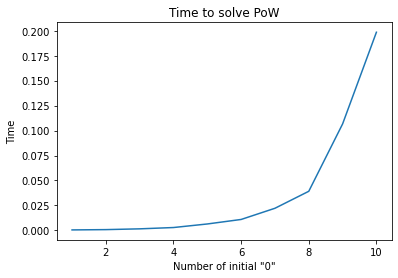

In [15]:
#solution: 
import time
import matplotlib.pyplot as plt

def numberOfInitZeros(hashStr):
  count = 0
  for i in range (0 , len(hashStr)):
    if hashStr[i] == '1':
      break
    count += 1
  return count

def PoWSolver(baseStr, zbits):
  nonce = 0
  while True:
    h = hashbits(baseStr + str(nonce))
    count = numberOfInitZeros(h)
    if count >= zbits:
      return nonce
    nonce += 1

baseStr = "Hello World!"
timeSeconds = []
zNum = [1,2,3,4,5,6,7,8,9,10]
for i in range(0 , 10):
  start_time = time.time()
  for j in range(30):  
    myStr = baseStr + str(j)
    nonce = PoWSolver(myStr , i)
  seconds = (time.time() - start_time)
  timeSeconds.append(seconds)
  #print(seconds)
  #print(nonce)
  #print(hashbits(baseStr + str(nonce)))

plt.plot(zNum, timeSeconds)
plt.title('Time to solve PoW')
plt.xlabel('Number of initial "0"')
plt.ylabel('Time')
plt.show()

## Exercise 2

### Mining power
Below is a stub for Block, Hashlist, and Miner classes. Miner 1 should have twice mining power as Miner 2. 
Note the new fields `Block.creator`, `Block.nonce`, and `HashList.difficulty`.
1. Complete PoWSolver and checkMiner functions. 
2. What is impact of mining power?

In [ ]:
class Block:
    def __init__(self, data, creator=None, previous=None, nonce=0):
        self.data = data
        if previous is None:
            self.previous = None
            self.previous_hash = ""
            self.creator = Miner(0 , "0")
        else:
            self.previous = previous
            self.previous_hash = previous.hash
            self.creator = creator
        self.nonce = nonce
        self.hash = self.hash_block()

    def hash_block(self):
        return hashbits(self.data+ self.creator.name + self.previous_hash + str(self.nonce))
        
class HashList:
    def __init__(self, genesis_data, difficulty):
        self.last = Block(genesis_data)
        self.difficulty = difficulty
        self.size = 0
        
    def add(self, newBlock):
        self.last = newBlock
        self.size +=1
        
    def checkMiner(self , miner):
      #return number of blocks created by the given miner



class Miner:
  def __init__(self, miningPower, name):
    self.miningPower = miningPower
    self.nonce = 0
    self.name = name
  
  def PoWSolver(self, bc):
    newBlock = Block(str(bc.size), self, bc.last)
    #Try self.miningPower many nonces for finding a block.
    #You can repeatedly adjust the nonce in newBlock and try hash_block.
    #If a solution is found that matches the difficulty of the blockchain, add it to the chain.
    #Use self.nonce to remember the last nonce between two trials.
    
bc = HashList("0" , 10)
m1 = Miner(2 ,"m1")
m2 = Miner(4, "m2")
while bc.size < 20:
  m1.PoWSolver(bc)
  m2.PoWSolver(bc)

print(bc.checkMiner(m1))
print(bc.checkMiner(m2))

In [27]:
#solution

class Block:
    def __init__(self, data, creator=None, previous=None, nonce=0):
        self.data = data
        if previous is None:
            self.previous = None
            self.previous_hash = ""
            self.creator = Miner(0 , "0")
        else:
            self.previous = previous
            self.previous_hash = previous.hash
            self.creator = creator
        self.nonce = nonce
        self.hash = self.hash_block()

    def hash_block(self):
        return hashbits(self.data+ self.creator.name + self.previous_hash + str(self.nonce))
        
class HashList:
    def __init__(self, genesis_data, difficulty):
        self.last = Block(genesis_data)
        self.difficulty = difficulty
        self.size = 0
        
    def add(self, newBlock):
        self.last = newBlock
        self.size +=1
        
    def checkMiner(self , miner):
        ptr = self.last
        count = 0
        while ptr != None:
          if ptr.creator == miner:
            count += 1
          ptr = ptr.previous
        return count



class Miner:
  def __init__(self, miningPower, name):
    self.miningPower = miningPower
    self.nonce = 0
    self.name = name
  
  def PoWSolver(self, bc):
    for i in range (0 , self.miningPower):
      newBlock = Block(str(bc.size), self, bc.last, self.nonce)
      h = newBlock.hash_block()
      flag = True
      for i in range (0 , bc.difficulty):
        if h[i] != '0':
          flag = False
          break
      if flag:
        bc.add(newBlock)
      self.nonce += 1

bc = HashList("0" , 10)
m1 = Miner(2 ,"m1")
m2 = Miner(4, "m2")
while bc.size < 20:
  m1.PoWSolver(bc)
  m2.PoWSolver(bc)

print(bc.checkMiner(m1))
print(bc.checkMiner(m2))

6
14


## Exercise 3

### Average time to solve PoW
Solve PoW 100 times with different data but same difficulty. 
1. What is the average time to solve PoW?
2. What is the minimum?
3. What is the maximum?

In [3]:
#solution: 
import time

def PoWSolver(baseStr, zbits):
  nonce = 0
  while True:
    h = hashbits(baseStr + str(nonce))
    flag = True
    for i in range (0 , zbits):
      if h[i] != '0':
        flag = False
        break
    if flag:
      return nonce
    nonce += 1

min = 1000000
max = 0
sum = 0
for i in range(0 , 100):
  start_time = time.time()
  baseStr = str(i)
  nonce = PoWSolver(baseStr , 12)
  seconds = (time.time() - start_time)
  if seconds < min:
    min = seconds
  if seconds > max:
    max = seconds
  sum += seconds

print("Min: "+str(min))
print("Max: "+str(max))
print("Avg: "+str(sum/100))

Min: 8.296966552734375e-05
Max: 0.23669004440307617
Avg: 0.04967851161956787
